In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd

# **Task P1.9**


Exploring more exercise data.

**a)** The file Examples.zip contains the three files Example1.csv, Example2.csv and
Example3.csv. These are sample se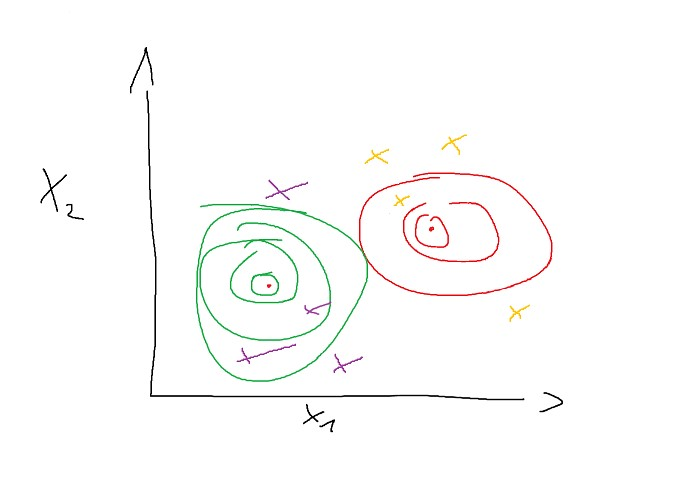ts. Load each of the .csv files.

Each column contains one sample of the sample set. The first row contains the class number
Ωκ. Rows two and three contain the two-dimensional feature vectors $c$.

For each file, plot all the features with different colors for the classes.

In [2]:
def load_and_visualize(path, description):
    df = pd.read_csv(path, header=None)
    data = df.T
    plt.scatter(data[1], data[2], c=data[0])
    plt.title(description)
    plt.show()

In [3]:
example1 = '/content/Example1.csv'
example2 = '/content/Example2.csv'
example3 = '/content/Example1.csv'

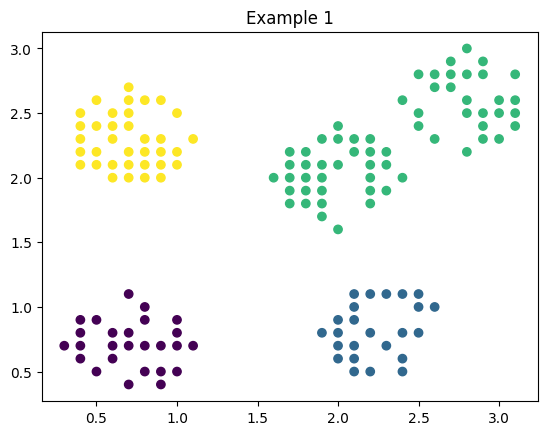

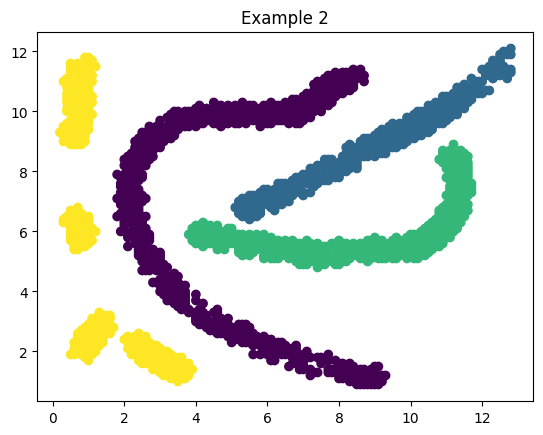

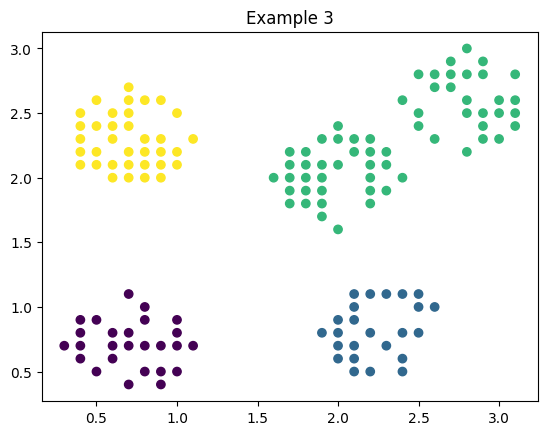

In [4]:
load_and_visualize(example1, 'Example 1')
load_and_visualize(example2, 'Example 2')
load_and_visualize(example3, 'Example 3')

**b)** A very famous sample set is Fisher's Iris data set [2]. The data set consists of 50 samples from
each of the three ower species Iris Setosa, Iris Virginica and Iris Versicolor. Four features were
measured from each sample: the length and the width of the sepals and petals, in centimeters.

The file iris-numclass.csv (in zip le FisherIris.zip) contains all 150 samples of the sample
set. Here each row contains one sample. The class number in column 1 contains the species (Iris
setosa, Iris virginica and Iris versicolor). The columns 2-5 contain the measurements of each
sample (sepal length, sepal width, petal length, petal width).

Plot all the features (maybe in dierent combinations of 2 features) with different colors for the classes.

In [5]:
iris = pd.read_csv('/content/iris-numclass.csv', header=None)
# iris.columns = ['class', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# iris
feature_dictionary = {
    0: 'class',
    1: 'sepal_length',
    2: 'sepal_width',
    3: 'petal_length',
    4: 'petal_width'
}

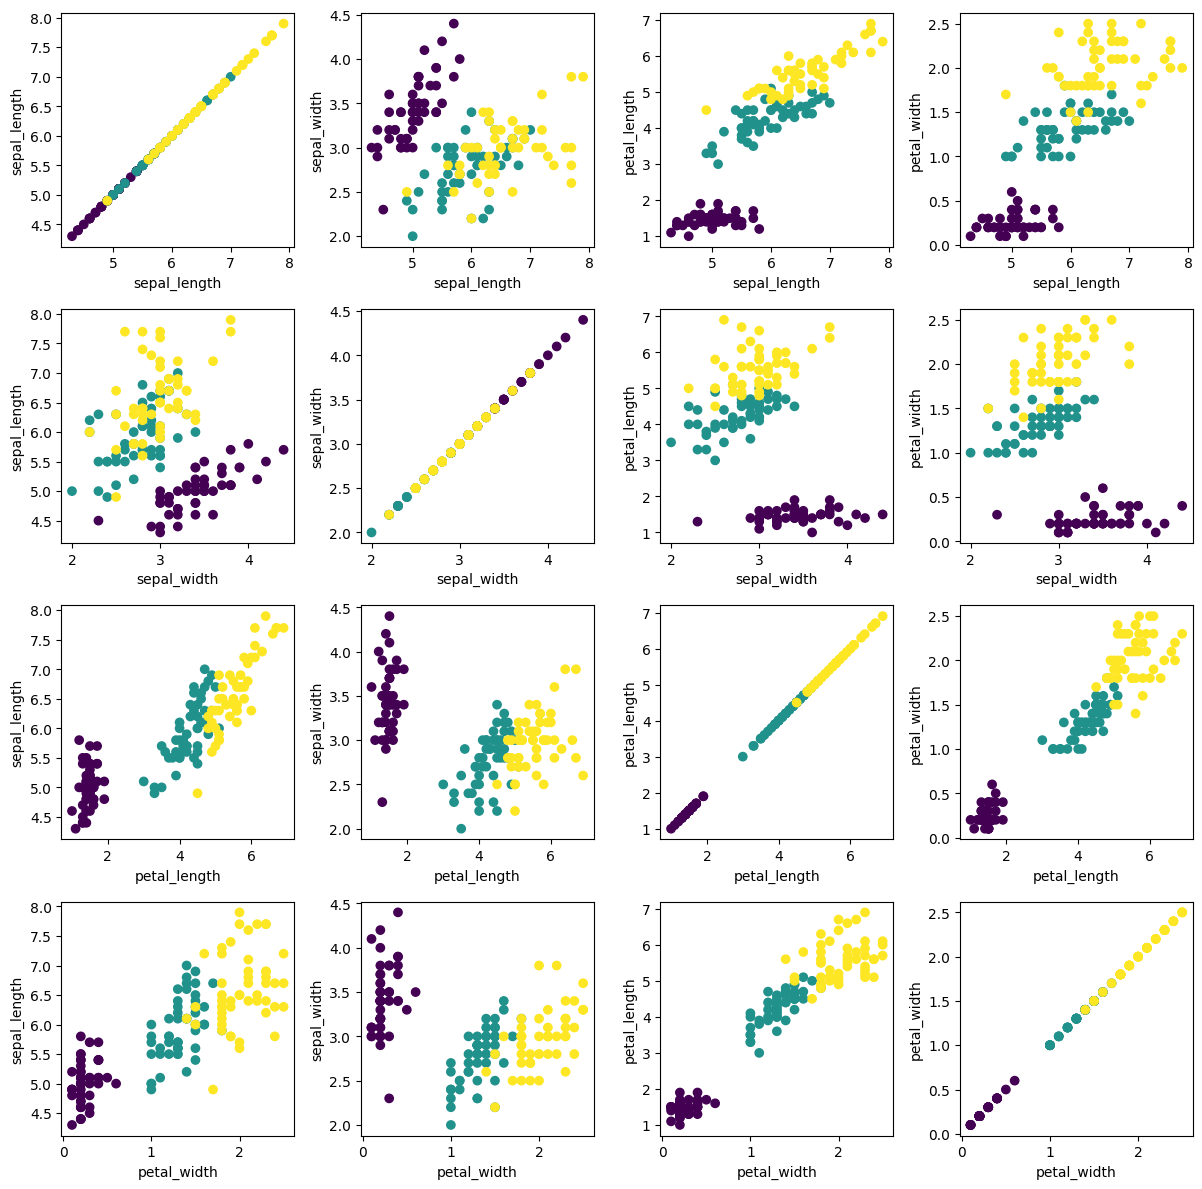

In [6]:
# make a multiplot with subplots of all different dimension combinations
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(1,5):
    for j in range(1,5):
        axs[i-1, j-1].scatter(iris[i], iris[j], c=iris[0])
        axs[i-1, j-1].xaxis.set_label_text(feature_dictionary[i])
        axs[i-1, j-1].yaxis.set_label_text(feature_dictionary[j])
plt.tight_layout()
plt.show()

**Task P1.10**

The following excercise is based on the large data set from [1], available in the file anthrokids.csv. It contains many body measurements from children and adolescents.

**a)** Split the data set into two sets: one for male and one for female persons. We will only use the
columns for the age as classes Ωκ and the height measurements as feature c.

In [7]:
df = pd.read_csv('/content/anthrokids.csv')
df.dropna(inplace=True)
df['age'] = df['age'].astype(int)

In [8]:
df_condensed = df[['age', 'height', 'gender']]
df_condensed = df_condensed.loc[df_condensed['age'] <= 18]

df_males = df_condensed.loc[df_condensed['gender'] == 'M']
df_females = df_condensed.loc[df_condensed['gender'] == 'F']

In [9]:
df_males['gender'].unique(), df_females['gender'].unique(),

(array(['M'], dtype=object), array(['F'], dtype=object))

**b)** Split the male and the female datasets into training and test data sets. A ratio of 2:1 is suitable.

In [10]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

males_train, males_test = train_test_split(df_males[['age', 'height']], test_size=0.3)
females_train, females_test = train_test_split(df_females[['age', 'height']], test_size=0.3)
print(f"Male_Train: {len(males_train)}, Male_Test: {len(males_test)}\nFemale_Train: {len(females_train)}, Female_Test: {len(females_test)}")

Male_Train: 1214, Male_Test: 521
Female_Train: 1199, Female_Test: 514


**c)** Use the training data sets to estimate the parameters for all classes: Estimate the parameters of normal distributions $p(c|Ω_{κ})$ for different ages (classes $Ω_{κ}$) given the features c (height measurements) of this class. Calculate the prior probabilities $p(Ω_{κ})$ of all classes. You might want to try with classes for ages of 3, 4, . . . , 18.

In [11]:
ages_means = males_train.groupby('age').mean()
ages_std = males_train.groupby('age').std()

ages_means.columns = ['Mean Height']
ages_means

,Mean Height
age,
2,91.396429
3,98.567188
4,105.642647
5,111.895890
6,119.047368
7,124.417722
8,130.570312
9,135.784783
10,140.667857


In [12]:
ages_std.columns = ['Std Height']
ages_std

,Std Height
age,
2,4.633412
3,3.581613
4,5.460094
5,5.145290
6,5.255715
7,5.344894
8,5.622310
9,6.357378
10,5.707196


In [13]:
all_samples = len(males_train)
ages_probabilities = males_train.groupby('age').count() / all_samples
ages_probabilities.columns = ['Probability']

ages_probabilities.cumsum()

,Probability
age,
2,0.023064
3,0.075783
4,0.131796
5,0.191928
6,0.238880
7,0.303954
8,0.356672
9,0.432455
10,0.501647


**d)** Go through all the data in the testing data sets and classify them with the optimal Bayes classifier:
- Use the feature c (height measurement) to evaluate the normal distributions $p(c|Ω_{κ})$ of all possible classes.
- Make a decision for the class $Ω_{κ}$ that maximizes the posterior $p(Ω_{κ}|c)$.
- Check if the decision is correct using the known real age.

In [14]:
from scipy import stats

ages = males_train['age'].unique()
ages.sort()

probabilities_heights = []

for height, test_age in zip(males_test['height'], males_test['age']):
    probabilities = {}
    print(f"Testing probabilities for {height}")
    for age, mean, std in zip(ages, ages_means['Mean Height'], ages_std['Std Height']):
        probability = stats.norm.pdf(height, mean, std)

        probabilities[age] = (probability, test_age)

    probabilities_heights.append(probabilities)

Testing probabilities for 153.2
Testing probabilities for 179.2
Testing probabilities for 168.2
Testing probabilities for 103.8
Testing probabilities for 181.8
Testing probabilities for 183.6
Testing probabilities for 139.6
Testing probabilities for 138.3
Testing probabilities for 119.8
Testing probabilities for 100.4
Testing probabilities for 97.2
Testing probabilities for 85.5
Testing probabilities for 145.2
Testing probabilities for 143.8
Testing probabilities for 162.2
Testing probabilities for 143.3
Testing probabilities for 140.2
Testing probabilities for 163.7
Testing probabilities for 142.5
Testing probabilities for 174.1
Testing probabilities for 138.6
Testing probabilities for 128.4
Testing probabilities for 149.7
Testing probabilities for 177.4
Testing probabilities for 146.7
Testing probabilities for 136.8
Testing probabilities for 168.2
Testing probabilities for 179.0
Testing probabilities for 136.8
Testing probabilities for 99.3
Testing probabilities for 98.4
Testing prob

In [15]:
males_test

,age,height
683,12,153.2
1930,15,179.2
1824,14,168.2
3708,4,103.8
1904,17,181.8
...,...,...
2142,11,162.8
2411,6,118.8
2362,6,119.5
3204,8,124.7


In [16]:
for height, test_age, probabilities in zip(males_test['height'], males_test['age'], probabilities_heights):
    print(f"Height: {height},\t Real Age: {test_age},\t Highest Probability Age: {max(probabilities, key=probabilities.get)}")

Height: 153.2,	 Real Age: 12,	 Highest Probability Age: 12
Height: 179.2,	 Real Age: 15,	 Highest Probability Age: 18
Height: 168.2,	 Real Age: 14,	 Highest Probability Age: 15
Height: 103.8,	 Real Age: 4,	 Highest Probability Age: 4
Height: 181.8,	 Real Age: 17,	 Highest Probability Age: 18
Height: 183.6,	 Real Age: 15,	 Highest Probability Age: 18
Height: 139.6,	 Real Age: 10,	 Highest Probability Age: 10
Height: 138.3,	 Real Age: 9,	 Highest Probability Age: 10
Height: 119.8,	 Real Age: 7,	 Highest Probability Age: 6
Height: 100.4,	 Real Age: 3,	 Highest Probability Age: 3
Height: 97.2,	 Real Age: 2,	 Highest Probability Age: 3
Height: 85.5,	 Real Age: 2,	 Highest Probability Age: 2
Height: 145.2,	 Real Age: 11,	 Highest Probability Age: 11
Height: 143.8,	 Real Age: 11,	 Highest Probability Age: 11
Height: 162.2,	 Real Age: 14,	 Highest Probability Age: 14
Height: 143.3,	 Real Age: 12,	 Highest Probability Age: 11
Height: 140.2,	 Real Age: 11,	 Highest Probability Age: 10
Height: 16

**e)** At the end calculate the overall recognition rates for the male and female data sets. Are you satised with the result?

In [17]:
# Pointblank accuracy +/- 0
all_test_samples = len(males_test)

correct_predictions = 0

for test_age, probabilities in zip(males_test['age'], probabilities_heights):
    if max(probabilities, key=probabilities.get) == test_age:
        correct_predictions += 1

print(f"Correct predictions: {correct_predictions},\t Total Samples: {all_test_samples},\t Accuracy: {correct_predictions/all_test_samples}")

Correct predictions: 199,	 Total Samples: 521,	 Accuracy: 0.381957773512476


In [18]:
# accuracy for +/- 1
all_test_samples = len(males_test)

correct_predictions = 0

for test_age, probabilities in zip(males_test['age'], probabilities_heights):
    if max(probabilities, key=probabilities.get) == test_age or max(probabilities, key=probabilities.get) == test_age + 1 or max(probabilities, key=probabilities.get) == test_age - 1:
        correct_predictions += 1

print(f"Correct predictions: {correct_predictions},\t Total Samples: {all_test_samples},\t Accuracy: {correct_predictions/all_test_samples}")

Correct predictions: 424,	 Total Samples: 521,	 Accuracy: 0.8138195777351248


**Task P1.11**

The following excercise is based on the Iris data and the data from Examples.zip.

**a)** Split each data set into training and test data.

In [19]:
def load_and_split_data(path, split, rotate=False):
    data = pd.read_csv(path, header=None)

    if rotate:
        data = data.T

    data_train, data_test = train_test_split(data, test_size=split, shuffle=True)

    return data_train, data_test

In [52]:
iris = '/content/iris-numclass.csv'
iris_train, iris_test = load_and_split_data(iris, 0.3)
iris_train.rename(columns=feature_dictionary, inplace=True)
iris_test.rename(columns=feature_dictionary, inplace=True)

example1 = '/content/Example1.csv'
example2 = '/content/Example2.csv'
example3 = '/content/Example3.csv'

example1_train, example1_test = load_and_split_data(example1, 0.3, rotate=True)
example2_train, example2_test = load_and_split_data(example2, 0.3, rotate=True)
example3_train, example3_test = load_and_split_data(example3, 0.3, rotate=True)

**b)** Implement a Bayes classier that estimates a two-dimensional normal distribution for each class for the data sets from Examples.zip. Use them to classify the test samples. Are you satised with the classication results?

In [21]:
def calculate_class_features(data, class_label=None):
    if class_label:
        mean = data.groupby([class_label]).mean()
        covariances = data.groupby([class_label]).cov()

        return mean, covariances

    means = data.groupby(0).mean()
    covariances = data.groupby(0).cov()

    return means, covariances

In [22]:
def segment_covariances_n_dim(covariances, n_dim):
    covariances_segmented = []

    for i in range(0, len(covariances), n_dim):
        covariances_segmented.append(covariances[i:i+n_dim])

    return covariances_segmented

In [23]:
def classify_example(data, means, covariances):

    class_probabilities = {}
    for i, (mean, cov) in enumerate(zip(means, covariances)):
        # print(f"{mean}, {cov}, {mean.shape}, {cov.shape}")
        multivariate_normal = stats.multivariate_normal(mean, cov)

        probability = multivariate_normal.pdf(data)

        class_probabilities[i+1] = probability

    return max(class_probabilities, key=class_probabilities.get)

In [24]:
def eval_accuracy(data, means, covariances):
    correct_predictions = 0
    predictions = []

    for sample in data.values:
        # print(f"Sample: {sample[1:]}")
        prediction = classify_example(sample[1:], means, segment_covariances_n_dim(covariances.values, means.shape[1]))
        predictions.append(prediction)
        if prediction == sample[0]:
            correct_predictions += 1

    return correct_predictions/len(data), correct_predictions, predictions


In [25]:
means_example1, cov_example1 = calculate_class_features(example1_train)
means_example2, cov_example2 = calculate_class_features(example2_train)
means_example3, cov_example3 = calculate_class_features(example3_train)

In [26]:
accuracy, correct_predictions, _ = eval_accuracy(example1_test, means_example1.values, cov_example1)
print(f"Accuracy: {accuracy},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example1_test)}")
accuracy, correct_predictions, _ = eval_accuracy(example2_test, means_example2.values, cov_example2)
print(f"Accuracy: {accuracy},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example2_test)}")
accuracy, correct_predictions, _ = eval_accuracy(example3_test, means_example3.values, cov_example3)
print(f"Accuracy: {accuracy},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example3_test)}")


Accuracy: 1.0,	 Correct Predictions: 44,	 Total Samples: 44
Accuracy: 0.9143730886850153,	 Correct Predictions: 598,	 Total Samples: 654
Accuracy: 0.5021204410517388,	 Correct Predictions: 592,	 Total Samples: 1179


**c)** Implement a Bayes classifier using normal distributions for the Iris data set. Vary the used features from using all 4 measurements per sample down to using only 1 of the measurements. Which of the possible feature combinations perform best and which worst? What conclusions do you draw from the results?

In [27]:
import itertools

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop through every possible combination of dimensions
for r in range(len(features), 0, -1):
    combinations = list(itertools.combinations(features, r))
    print(f"Combinations of {r} dimensions: ")
    for combination in combinations:
        column_list = ['class']
        column_list.extend(list(combination))

        mean, cov = calculate_class_features(iris_train[column_list], class_label='class')
        accuracy, correct_predictions, _ = eval_accuracy(iris_test[column_list], mean.values, cov)
        print(f"Accuracy: {round(accuracy, 3)},\t Correct Predictions: {correct_predictions} | Combination: {combination}")

Combinations of 4 dimensions: 
Accuracy: 0.978,	 Correct Predictions: 44 | Combination: ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
Combinations of 3 dimensions: 
Accuracy: 0.956,	 Correct Predictions: 43 | Combination: ('sepal_length', 'sepal_width', 'petal_length')
Accuracy: 0.933,	 Correct Predictions: 42 | Combination: ('sepal_length', 'sepal_width', 'petal_width')
Accuracy: 0.978,	 Correct Predictions: 44 | Combination: ('sepal_length', 'petal_length', 'petal_width')
Accuracy: 0.978,	 Correct Predictions: 44 | Combination: ('sepal_width', 'petal_length', 'petal_width')
Combinations of 2 dimensions: 
Accuracy: 0.756,	 Correct Predictions: 34 | Combination: ('sepal_length', 'sepal_width')
Accuracy: 0.978,	 Correct Predictions: 44 | Combination: ('sepal_length', 'petal_length')
Accuracy: 0.978,	 Correct Predictions: 44 | Combination: ('sepal_length', 'petal_width')
Accuracy: 0.911,	 Correct Predictions: 41 | Combination: ('sepal_width', 'petal_length')
Accuracy: 0.

**d)** Look for ways to visualize how your classifiers work in the case of two-dimensional features. The important thing here is: Which areas of the feature space are assigned to which class?

In [28]:
two_d = ['class', 'sepal_length', 'sepal_width']
mean, cov = calculate_class_features(iris_train[two_d], class_label='class')
covariance_list = segment_covariances_n_dim(cov.values, mean.shape[1])
accuracy, correct_predictions, predictions = eval_accuracy(iris_test[two_d], mean.values, cov)

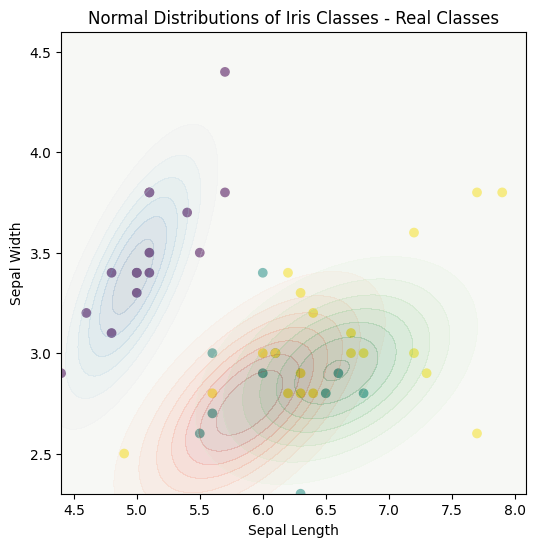

In [29]:
x, y = np.mgrid[iris_test['sepal_length'].min():iris_test['sepal_length'].max()+0.2:.01, iris_test['sepal_width'].min():iris_test['sepal_width'].max()+0.2:.01]

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(iris_test['sepal_length'], iris_test['sepal_width'], c=iris_test['class'])
ax.contourf(x, y, stats.multivariate_normal(mean.values[0], covariance_list[0]).pdf(pos), cmap='Blues', alpha=0.2)
ax.contourf(x, y, stats.multivariate_normal(mean.values[1], covariance_list[1]).pdf(pos), cmap='Reds', alpha=0.2)
ax.contourf(x, y, stats.multivariate_normal(mean.values[2], covariance_list[2]).pdf(pos), cmap='Greens', alpha=0.2)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Normal Distributions of Iris Classes - Real Classes')
plt.show()

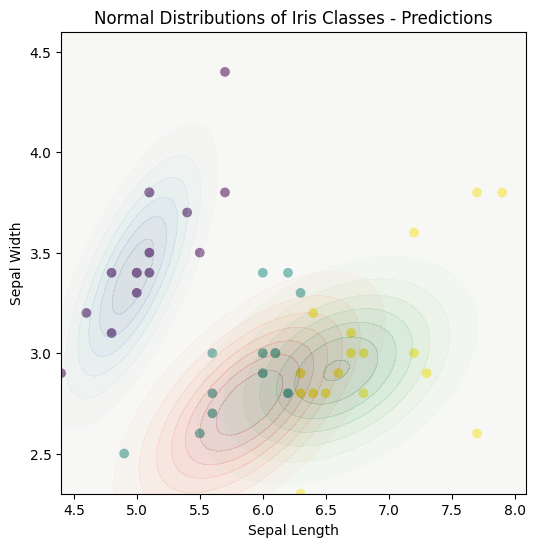

In [30]:
x, y = np.mgrid[iris_test['sepal_length'].min():iris_test['sepal_length'].max()+0.2:.01, iris_test['sepal_width'].min():iris_test['sepal_width'].max()+0.2:.01]

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(iris_test['sepal_length'], iris_test['sepal_width'], c=np.array((predictions)))
ax.contourf(x, y, stats.multivariate_normal(mean.values[0], covariance_list[0]).pdf(pos), cmap='Blues', alpha=0.2)
ax.contourf(x, y, stats.multivariate_normal(mean.values[1], covariance_list[1]).pdf(pos), cmap='Reds', alpha=0.2)
ax.contourf(x, y, stats.multivariate_normal(mean.values[2], covariance_list[2]).pdf(pos), cmap='Greens', alpha=0.2)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Normal Distributions of Iris Classes - Predictions')
plt.show()

**Task P1.12**
We will try to improve the classification results from Exercise 3.

The critical point with the previous classifier is the choice of the underlying density function. If a
unimodal density does not produce satisfying results, one can turn to mixture distributions.

Replace the classifier from Exercise 3 with one that estimates a mixture distribution in training. What results do you get with this classifier? How do you choose the number of mixture components?

In [42]:
def normal_pdf(x, mean, cov):
    d = x.shape[1]
    diff = x - mean
    exponent = np.exp(-0.5 * np.sum(diff * np.linalg.solve(cov, diff.T).T, axis=1))
    normalize = np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
    return exponent / normalize

def em_alg_multi_dim(samples, k, iterations):
    num_samples, dim = samples.shape

    mean_k = np.random.randn(k, dim)
    cov_k = np.array([np.eye(dim)] * k)
    pi_k = np.ones(k) / k

    for i in range(iterations):
        # e-step
        r_in = np.zeros((num_samples, k))
        for n in range(k):
            r_in[:, n] = pi_k[n] * normal_pdf(samples, mean_k[n], cov_k[n])
        r_in /= np.sum(r_in, axis=1, keepdims=True)

        # m-step
        R_n = np.sum(r_in, axis=0)
        pi_k = R_n / num_samples
        for n in range(k):
            mean_k[n] = np.sum(r_in[:, n].reshape((-1, 1)) * samples, axis=0) / R_n[n]
            diff = samples - mean_k[n]
            cov_k[n] = (r_in[:, n].reshape((-1, 1, 1)) * np.matmul(diff[:, :, np.newaxis], diff[:, np.newaxis, :])).sum(axis=0) / R_n[n]
    return mean_k, cov_k, pi_k

In [43]:
def classify_example_mixture(example, mixtures_classes):
    probabilities = []
    for mean, cov, pi in mixtures_classes:
        probability = 0
        for i in range(len(mean)):
            probability += pi[i] * stats.multivariate_normal(mean[i], cov[i]).pdf(example)
        probabilities.append(probability)
    return np.argmax(probabilities) + 1

In [44]:
def evaluate_model(samples, mixtures_classes):
    predictions = samples.drop(columns=0).apply(lambda x: classify_example_mixture(x, mixtures_classes), axis=1)

    correct_predictions = 0
    for target, prediction in zip(samples[0].values, predictions.values):
        if prediction == target:
            correct_predictions += 1

    return correct_predictions/len(samples[0].values), correct_predictions, predictions.values

In [45]:
def estimate_mixtures(data, k, iterations, class_label=None):
    mixtures_classes = []

    for i in range(1, 5):

        if class_label:
            samples = data[data[class_label] == i].drop(columns=class_label).values
        else:
            samples = data[data[0] == i].drop(columns=0).values

        mixtures_classes.append(em_alg_multi_dim(samples, k, iterations))

    return mixtures_classes

In [57]:
mixtures_classes_example_1 = estimate_mixtures(example1_train, 2, 100)
mixtures_classes_example_2 = estimate_mixtures(example2_train, 2, 100)
mixtures_classes_example_3 = estimate_mixtures(example3_train, 4, 100)

In [58]:
# plot mixtures
def plot_mixtures(samples, mixtures_classes):
    components = mixtures_classes[0][0].shape[0]
    x, y = np.mgrid[samples.values[:, 1].min():samples.values[:, 1].max()+0.2:.01, samples.values[:, 2].min():samples.values[:, 2].max()+0.2:.01]

    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y

    cmap = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    for i in range(1, 5):
        for j in range(components):
            ax.contourf(x, y, stats.multivariate_normal(mixtures_classes[i-1][0][j], mixtures_classes[i-1][1][j]).pdf(pos), cmap=cmap[j], alpha=0.3)
        # ax.contourf(x, y, stats.multivariate_normal(mixtures_classes_example_1[i-1][0][0], mixtures_classes_example_1[i-1][1][0]).pdf(pos), cmap='Blues', alpha=0.2)
        # ax.contourf(x, y, stats.multivariate_normal(mixtures_classes_example_1[i-1][0][1], mixtures_classes_example_1[i-1][1][1]).pdf(pos), cmap='Reds', alpha=0.2)
    ax.scatter(samples.values[:, 1], samples.values[:, 2], c=samples.values[:, 0])
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Normal Distributions of Example 1 - Real Classes')
    plt.show()

In [59]:
accuracy, correct_predictions, _ = evaluate_model(example1_test, mixtures_classes_example_1)
print(f"Accuracy: {accuracy},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example1_test)}")
accuracy, correct_predictions, _ = evaluate_model(example2_test, mixtures_classes_example_2)
print(f"Accuracy: {accuracy},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example2_test)}")
accuracy, correct_predictions, _ = evaluate_model(example3_test, mixtures_classes_example_3)
print(f"Accuracy: {accuracy},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example3_test)}")

Accuracy: 1.0,	 Correct Predictions: 44,	 Total Samples: 44
Accuracy: 0.9556574923547401,	 Correct Predictions: 625,	 Total Samples: 654
Accuracy: 0.998303647158609,	 Correct Predictions: 1177,	 Total Samples: 1179


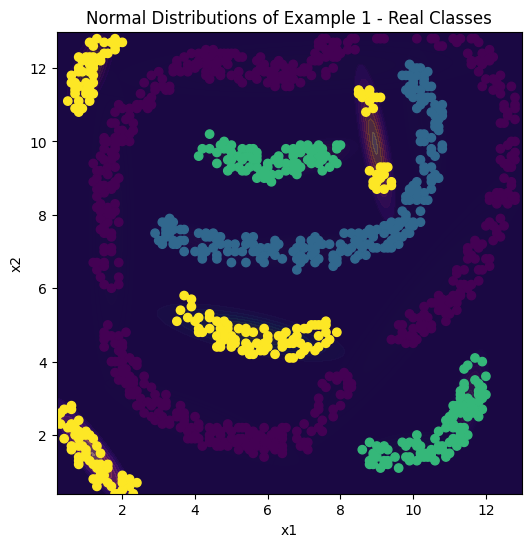

In [60]:
plot_mixtures(example3_test, mixtures_classes_example_3)

**Task P1.13**

Comparing classier performance.

**a)** Implement a classier based on the idea of Parzen estimation.

For this purpose, realize a function to compute $p(c|Ω_{κ})$ according to the idea of a Parzen
estimation (kernel density estimation). Your function should take as input a classified sample
set, the class $κ$ to be evaluated, the covariance matrix $Σ$ and of course the feature vector $c$.

You can use $p(c|Ω_κ)$ and $p(Ω_{κ})$ to perform a Bayesian classication.

In [61]:
samples_example_1 = example1_train[example1_train[0] == 1].drop(columns=0).values

In [62]:
def parzen_estimation_single_class(samples, cov, c):

    parzen_sum = 0
    for sample in samples:
        kernel = multivariate_normal.pdf(c, sample, cov)
        parzen_sum += kernel

    return parzen_sum / len(samples)

In [63]:
def parzen_estimation(train, test, cov):
    estimates_classes = []
    test_samples = test.drop(columns=0).values

    for i in range(1, 5):
        train_samples = train[train[0] == i].drop(columns=0).values

        test_estimates = []
        for test_sample in test_samples:
            test_estimates.append(parzen_estimation_single_class(train_samples, cov, test_sample))

        estimates_classes.append(test_estimates)

    return estimates_classes

In [64]:
def parzen_estimation(train, test, cov):
    estimates_classes = []
    test_samples = test.drop(columns=0).values

    for test_sample in test_samples:

        sample_estimates = []
        for i in range(1, 5):
            train_samples = train[train[0] == i].drop(columns=0).values

            sample_estimates.append(parzen_estimation_single_class(train_samples, cov, test_sample))

        estimates_classes.append(sample_estimates)

    predictions = []

    for sample_estimate in estimates_classes:
        predictions.append(np.argmax(sample_estimate) + 1)

    return estimates_classes

In [65]:
def evaluate_model(targets, predictions):
    correct_predictions = 0
    for target, prediction in zip(targets[0].values, predictions):
        if prediction == target:
            correct_predictions += 1

    return correct_predictions/len(targets[0].values), correct_predictions, predictions.values

In [66]:
cov = np.array([[0.1, 0], [0, 0.1]])
parzen_estimations = parzen_estimation(example3_train, example3_test, cov)

In [67]:
predictions = []

for sample_estimate in parzen_estimations:
    predictions.append(np.argmax(sample_estimate) + 1)

In [68]:
correct_predictions = 0
for target, prediction in zip(example3_test[0].values, predictions):
    if prediction == target:
        correct_predictions += 1

print(f"Accuracy: {correct_predictions/len(example3_test[0].values)},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example3_test)}")

Accuracy: 1.0,	 Correct Predictions: 1179,	 Total Samples: 1179


**b)** Implement a Nearest Neighbor classifier.

Write a function that takes a classified sample set, a parameter $m$, and the feature vector $c$.
Your function should now search for the $m$ nearest neighbors within the sample set to the
feature vector $c$. Use this to calculate the probabilities $p(Ω_κ|c)$ = $m_κ/m$ by counting within these neighbors the memberships $m_κ$ to each class.

You can use $p(Ω_κ|c)$ to perform a Bayesian classication.

In [69]:
def classify_sample(train_samples, m, c):
    distances = []
    for train_sample in train_samples[:, 1:]:
        distances.append(np.linalg.norm(train_sample - c))

    # get m nearest neighbors
    distances = np.array(distances)
    distances = np.argsort(distances)

    train_samples = train_samples[distances[:m]]

    # count classes
    classes = np.zeros(4)
    for train_sample in train_samples:
        classes[int(train_sample[0])-1] += 1

    return np.argmax(classes) + 1

In [70]:
predictions = []

for sample in example3_test.values[:, 1:]:
    predictions.append(classify_sample(example3_train.values, 5, sample))

In [71]:
correct_predictions = 0
for target, prediction in zip(example3_test[0].values, predictions):
    if prediction == target:
        correct_predictions += 1

print(f"Accuracy: {correct_predictions/len(example3_test[0].values)},\t Correct Predictions: {correct_predictions},\t Total Samples: {len(example3_test)}")

Accuracy: 1.0,	 Correct Predictions: 1179,	 Total Samples: 1179


**c)** You have previously examined the data sets from Fisher's Iris data set [2] and from
Examples.zip. Now use these to evaluate the performance of dierent classication methods.
Compare the achievable classication rates for the following classiers:
- Simple normal distribution classier with a unimodal, multivariate normal distribution as the underlying density. This corresponds in essence to the classication exercises for the
Kids' Size Problem.
- Classication based on a Parzen estimate.
- Classication with the Nearest Neighbor classier.
- If you have other classiers available, feel free to include and compare their results.

Which classication methods would you choose for a practical application depending on the
data set?

After examining the data sets, you already get more or less a feeling of which classifier will perform well. For example the 'Example1' dataset it is sufficient to use a simple normal distribution classifier as the classes are already well separated and the data can be described well with a simple normal distribution.

Other data sets might require more complex distributions in the form of mixtures that can represent the data better.

The Nearest Neighbor classifier is also a valid choice for many data sets, but it is very sensitive to outliers and noise. It is also very slow for large data sets.

**d)** Take the entire Fisher's Iris data set [2] and ignore the membership of the samples to the dierent ower species.

Use your EM algorithm to estimate a mixture distribution with 3 components from this data.
How do the individual mixture components relate to the species data? For visualization, you
can limit yourself to 2 dimensions (sepal length/width or petal length/width).

In [72]:
iris_train

,class,sepal_length,sepal_width,petal_length,petal_width
103,3,6.3,2.9,5.6,1.8
140,3,6.7,3.1,5.6,2.4
65,2,6.7,3.1,4.4,1.4
33,1,5.5,4.2,1.4,0.2
27,1,5.2,3.5,1.5,0.2
...,...,...,...,...,...
48,1,5.3,3.7,1.5,0.2
35,1,5.0,3.2,1.2,0.2
137,3,6.4,3.1,5.5,1.8
119,3,6.0,2.2,5.0,1.5


In [73]:
mixtures_iris = estimate_mixtures(iris_train, 3, 100, 'class')

<ipython-input-42-b664c5f0561a>:4: RuntimeWarning: overflow encountered in exp
  exponent = np.exp(-0.5 * np.sum(diff * np.linalg.solve(cov, diff.T).T, axis=1))
<ipython-input-42-b664c5f0561a>:6: RuntimeWarning: divide by zero encountered in divide
  return exponent / normalize
<ipython-input-42-b664c5f0561a>:6: RuntimeWarning: invalid value encountered in divide
  return exponent / normalize
<ipython-input-42-b664c5f0561a>:20: RuntimeWarning: invalid value encountered in divide
  r_in /= np.sum(r_in, axis=1, keepdims=True)
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
<ipython-input-42-b664c5f0561a>:4: RuntimeWarning: overflow encountered in exp
  exponent = np.exp(-0.5 * np.sum(diff * np.linalg.solve(cov, diff.T).T, axis=1))
<ipython-input-42-b664c5f0561a>:5: RuntimeWarning: invalid value encountered in sqrt
  normalize = np.sqrt((2 * np.pi) ** d * np.linalg.det(cov

In [74]:
iris_test

,class,sepal_length,sepal_width,petal_length,petal_width
88,2,5.6,3.0,4.1,1.3
117,3,7.7,3.8,6.7,2.2
138,3,6.0,3.0,4.8,1.8
64,2,5.6,2.9,3.6,1.3
122,3,7.7,2.8,6.7,2.0
124,3,6.7,3.3,5.7,2.1
8,1,4.4,2.9,1.4,0.2
102,3,7.1,3.0,5.9,2.1
34,1,4.9,3.1,1.5,0.1
108,3,6.7,2.5,5.8,1.8


In [78]:
shit=estimate_mixtures(iris_train, 3, 100)
plot_mixtures(iris_test, shit)

KeyError: ignored

<ipython-input-86-9a5ab9287a04>:34: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = plt.matplotlib.patches.Ellipse([mean_x, mean_y], v[0], v[1], 180.0 + angle, color='red', alpha=0.3)


AttributeError: ignored

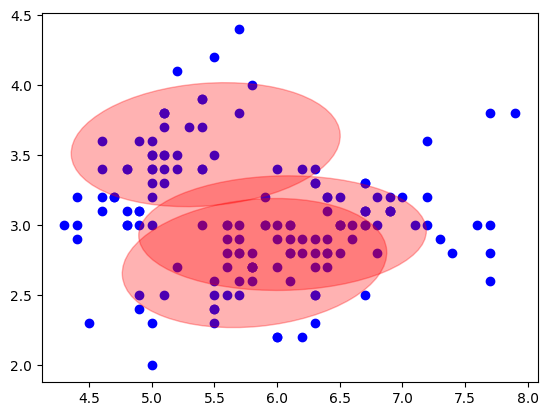

In [86]:
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
from sklearn import datasets
import matplotlib.pyplot as plt
#print(f"\nDataset: {dataset_name}")
iris = pd.read_csv("/content/iris-numclass.csv", header = None)
iris.columns = ['class', "Sepal length" , "Sepal Width", "Petal Length", "Petal Width"]
iris_X = iris.drop('class', axis=1)
iris_y = iris['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y, test_size=0.3, random_state=42)

# Convert class labels to categorical type
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Load Fisher's Iris dataset
iris = datasets.load_iris()
iris_data = iris.data[:, :2]  # Selecting the first two features for simplicity

# Initialize parameters
num_components = 3
initial_pi = np.ones(num_components) / num_components
initial_mu = iris_data[np.random.choice(len(iris_data), num_components, replace=False)]
initial_sigma = [np.cov(iris_data.T) for _ in range(num_components)]
def plot_covariance(covariance, mean_x, mean_y, ax):
    v, w = np.linalg.eigh(covariance)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])

    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    ell = plt.matplotlib.patches.Ellipse([mean_x, mean_y], v[0], v[1], 180.0 + angle, color='red', alpha=0.3)
    ax.add_patch(ell)

def em_algorithm(pi, mu, sigma, points, dist_amount, activate_display=True, max_iterations=40):
    likelihood_hist = []

    for iter in range(max_iterations):
        # E-Step (Expectation): Calculate the responsibilities
        r = []

        for n in range(dist_amount):
            r.append((pi[n] * multivariate_normal(mu[n], sigma[n]).pdf(points)) /
                     sum([pi[j] * multivariate_normal(mu[j], sigma[j]).pdf(points) for j in range(dist_amount)]))
        r = np.array(r).transpose()

        R = np.sum(r, axis=0)

        # M-step (Maximization): Re-estimate parameters using the current responsibilities
        for n in range(dist_amount):
            mu[n] = [(1.0 / R[n]) * np.sum(np.array(r)[:, n] * np.array(points)[:, i]) for i in range(len(mu[n]))]

            tmp = []
            for i in range(len(points)):
                tmp.append(np.array(r)[i, n] * np.array((points - mu[n])[i]).reshape(-1, 1) @
                           np.array((points - mu[n])[i]).reshape(-1, 1).transpose())
            sigma[n] = (1.0 / R[n]) * np.sum(np.array(tmp), axis=0)
            pi[n] = R[n] / dist_amount

        # Iterate until log-likelihood becomes stable
        if len(likelihood_hist) > 0:
            # termination condition
            if abs(likelihood_hist[-1] - logsumexp(R)) < 0.3:
                if activate_display:
                    ax = plt.subplot(111)
                    ax.scatter(points[:, 0], points[:, 1], color='blue')
                    for n in range(dist_amount):
                        plot_covariance(sigma[n], mu[n][0], mu[n][1], ax)
                    plt.show()
                break

        likelihood_hist.append(logsumexp(R))

        if activate_display:
            ax = plt.subplot(111)
            ax.scatter(points[:, 0], points[:, 1], color='blue')
            for n in range(dist_amount):
                plot_covariance(sigma[n], mu[n][0], mu[n][1], ax)
            display.display(plt.show())
            display.clear_output(wait=True)
        else:
            print(f"mu: {mu}, sigma: {sigma}")

    return likelihood_hist

# Run EM algorithm
likelihood_history = em_algorithm(initial_pi, initial_mu, initial_sigma, iris_data, num_components)

# Visualize the results
plt.plot(likelihood_history)
plt.title('EM Algorithm Convergence')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.show()
